In [1]:
import pandas as pd

In [3]:
dataset=pd.read_csv("insurance_pre.csv")

In [5]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [7]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [9]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [11]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [13]:
independent=dataset[['age', 'bmi', 'children','age', 'bmi', 'children']]

In [15]:
independent

,age,bmi,children,age,bmi,children
0,19,27.900,0,19,27.900,0
1,18,33.770,1,18,33.770,1
2,28,33.000,3,28,33.000,3
3,33,22.705,0,33,22.705,0
4,32,28.880,0,32,28.880,0
...,...,...,...,...,...,...
1333,50,30.970,3,50,30.970,3
1334,18,31.920,0,18,31.920,0
1335,18,36.850,0,18,36.850,0
1336,21,25.800,0,21,25.800,0


In [17]:
dependent=dataset[['charges']]

In [19]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [21]:
#!pip install scikit_learn

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [107]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="poisson",splitter="random")
regressor=regressor.fit(x_train,y_train)

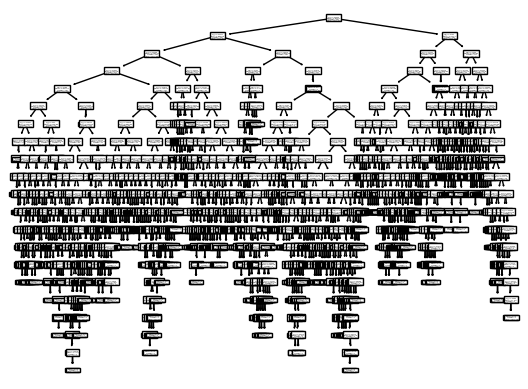

In [109]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [110]:
y_pred=regressor.predict(x_test)

In [111]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [112]:
r_score

-0.7241058131923357